In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [2]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [3]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [4]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )

In [5]:
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

In [7]:
# lr = LogisticRegression(
#     random_state=0,
#     max_iter=5000,
#     penalty='l2',
#     C=1.0,
#     solver='lbfgs',
#     tol=0.0001,
#     class_weight=None
# )
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Realizar predicciones en el conjunto de prueba
y_pred = lr.predict(X_test)

+ hito1 tiene un alto impacto y acopañado por exitosos con valores interesantes.
+ una de las preguntas e29 tiene un alto impacto para investigar.

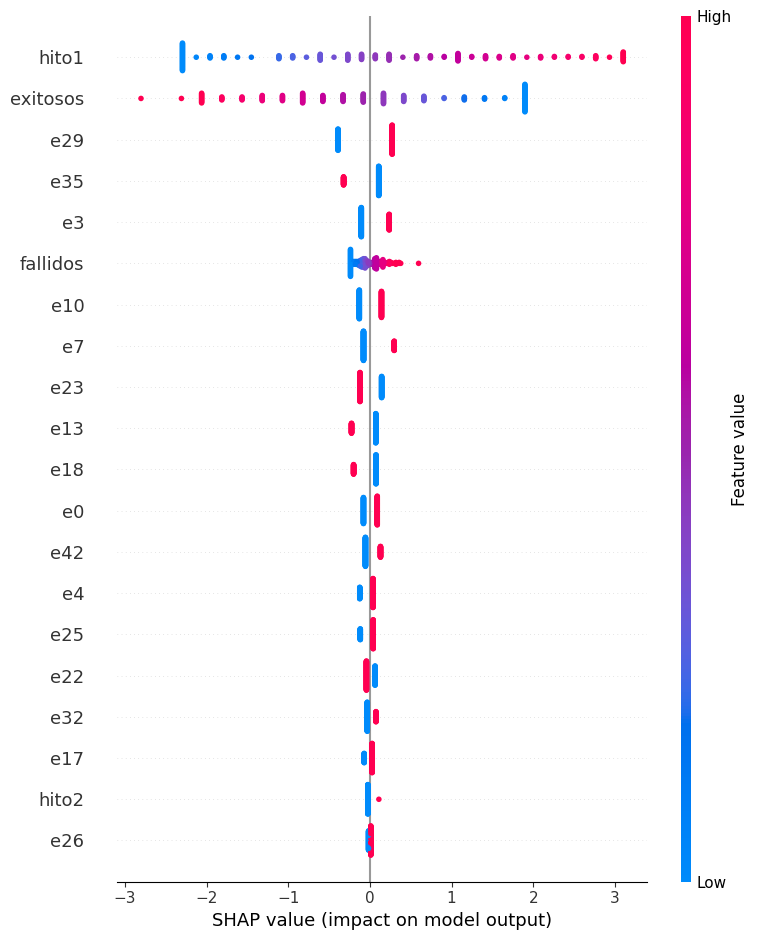

In [9]:
# Explicación de las predicciones utilizando SHAP
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Utilizando regresion logistica podemos ver la interpretacion la cual nos muestra el mayor impacto positivo:
+ hito1: 22.0
+ e29: 1.0
Y el impacto mas negativo:
+ exitosos = 12.0
+ e18 = 1.0
+ fallidos = 4.0

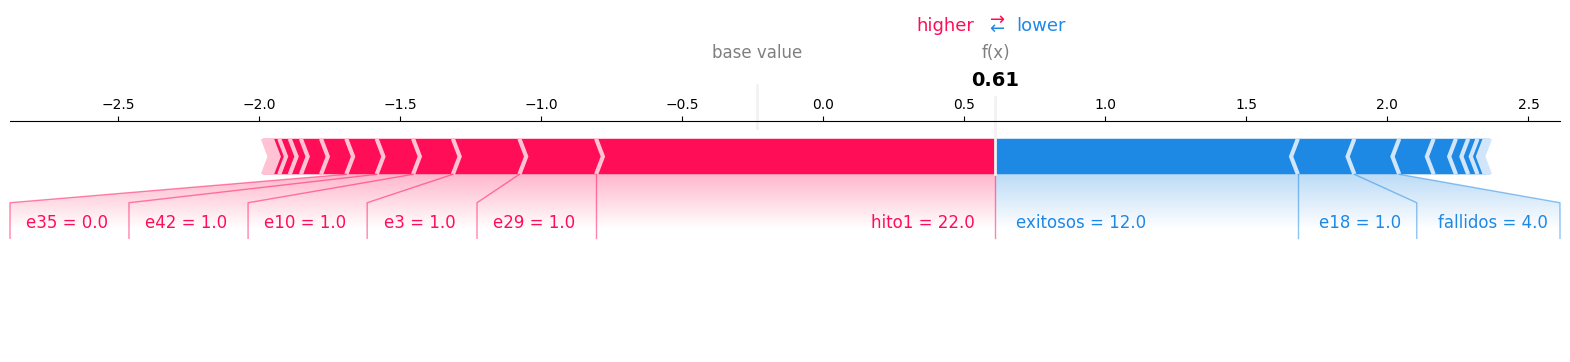

In [10]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

In [11]:
shap.force_plot(explainer.expected_value, shap_values, X_test, matplotlib=False)
